## Python Libaries

In [1]:
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, metrics,preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve, auc
from collections import Counter
from scipy.stats import norm
# from sklearn.model_selection import RandomizedSearchCV
# import seaborn as sns; sns.set(font_scale=1.2)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Read CSV files

In [2]:
main_path='C:/Users/Sultan/Desktop/Nahid_MIMIC/mimic-iii-clinical-database-1.4/'
filename='MICROBIOLOGYEVENTS.csv'
data = pd.read_csv(main_path+filename)
data

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,744,96,170324,2156-04-13 00:00:00,2156-04-13 14:18:00,70021.0,BRONCHOALVEOLAR LAVAGE,80026.0,PSEUDOMONAS AERUGINOSA,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,745,96,170324,2156-04-20 00:00:00,2156-04-20 13:10:00,70062.0,SPUTUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,746,96,170324,2156-04-20 00:00:00,2156-04-20 16:00:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,747,96,170324,2156-04-20 00:00:00,NaN,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,748,96,170324,2156-04-20 00:00:00,NaN,70079.0,URINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631721,630931,99783,126090,2125-11-05 00:00:00,2125-11-05 13:15:00,70076.0,TISSUE,80066.0,ASPERGILLUS FUMIGATUS,2.0,NaN,NaN,NaN,NaN,NaN,NaN
631722,630932,99783,126090,2125-11-06 00:00:00,2125-11-06 10:24:00,70076.0,TISSUE,80066.0,ASPERGILLUS FUMIGATUS,1.0,NaN,NaN,NaN,NaN,NaN,NaN
631723,630933,99783,126090,2125-11-06 00:00:00,2125-11-06 10:24:00,70076.0,TISSUE,80066.0,ASPERGILLUS FUMIGATUS,2.0,NaN,NaN,NaN,NaN,NaN,NaN
631724,630934,99783,126090,2125-11-07 00:00:00,2125-11-07 12:40:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
## Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631726 entries, 0 to 631725
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ROW_ID               631726 non-null  int64  
 1   SUBJECT_ID           631726 non-null  int64  
 2   HADM_ID              631726 non-null  int64  
 3   CHARTDATE            631726 non-null  object 
 4   CHARTTIME            589954 non-null  object 
 5   SPEC_ITEMID          631647 non-null  float64
 6   SPEC_TYPE_DESC       631726 non-null  object 
 7   ORG_ITEMID           326881 non-null  float64
 8   ORG_NAME             328016 non-null  object 
 9   ISOLATE_NUM          328016 non-null  float64
 10  AB_ITEMID            275834 non-null  float64
 11  AB_NAME              275834 non-null  object 
 12  DILUTION_TEXT        267350 non-null  object 
 13  DILUTION_COMPARISON  267178 non-null  object 
 14  DILUTION_VALUE       267178 non-null  float64
 15  INTERPRETATION   

In [4]:
## delete cloumns
data.drop(columns=['INTERPRETATION', 'DILUTION_VALUE','DILUTION_COMPARISON','DILUTION_TEXT','AB_NAME','AB_ITEMID'], axis=1)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM
0,744,96,170324,2156-04-13 00:00:00,2156-04-13 14:18:00,70021.0,BRONCHOALVEOLAR LAVAGE,80026.0,PSEUDOMONAS AERUGINOSA,1.0
1,745,96,170324,2156-04-20 00:00:00,2156-04-20 13:10:00,70062.0,SPUTUM,NaN,NaN,NaN
2,746,96,170324,2156-04-20 00:00:00,2156-04-20 16:00:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN
3,747,96,170324,2156-04-20 00:00:00,NaN,70012.0,BLOOD CULTURE,NaN,NaN,NaN
4,748,96,170324,2156-04-20 00:00:00,NaN,70079.0,URINE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
631721,630931,99783,126090,2125-11-05 00:00:00,2125-11-05 13:15:00,70076.0,TISSUE,80066.0,ASPERGILLUS FUMIGATUS,2.0
631722,630932,99783,126090,2125-11-06 00:00:00,2125-11-06 10:24:00,70076.0,TISSUE,80066.0,ASPERGILLUS FUMIGATUS,1.0
631723,630933,99783,126090,2125-11-06 00:00:00,2125-11-06 10:24:00,70076.0,TISSUE,80066.0,ASPERGILLUS FUMIGATUS,2.0
631724,630934,99783,126090,2125-11-07 00:00:00,2125-11-07 12:40:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN


## Remove The NaN Values

In [5]:
data.dropna(subset=['SUBJECT_ID','HADM_ID','CHARTDATE','SPEC_ITEMID','SPEC_TYPE_DESC','ORG_ITEMID','AB_NAME'])

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
27,771,106,145167,2192-08-09 00:00:00,2192-08-09 21:11:00,70062.0,SPUTUM,80023.0,STAPH AUREUS COAG +,1.0,90012.0,GENTAMICIN,<=0.5,<=,1.0,S
28,772,106,145167,2192-08-09 00:00:00,2192-08-09 21:11:00,70062.0,SPUTUM,80023.0,STAPH AUREUS COAG +,1.0,90016.0,OXACILLIN,0.5,=,1.0,S
29,773,106,145167,2192-08-09 00:00:00,2192-08-09 21:11:00,70062.0,SPUTUM,80023.0,STAPH AUREUS COAG +,1.0,90006.0,ERYTHROMYCIN,=>8,=>,8.0,R
30,774,106,145167,2192-08-09 00:00:00,2192-08-09 21:11:00,70062.0,SPUTUM,80023.0,STAPH AUREUS COAG +,1.0,90002.0,PENICILLIN,=>0.5,=>,1.0,R
31,775,106,145167,2192-08-09 00:00:00,2192-08-09 21:11:00,70062.0,SPUTUM,80023.0,STAPH AUREUS COAG +,1.0,90025.0,LEVOFLOXACIN,0.25,=,0.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631679,630889,99776,136231,2171-07-18 00:00:00,2171-07-18 12:40:00,70076.0,TISSUE,80023.0,STAPH AUREUS COAG +,1.0,90007.0,CLINDAMYCIN,<=0.25,<=,0.0,S
631680,630890,99776,136231,2171-07-18 00:00:00,2171-07-18 12:40:00,70076.0,TISSUE,80023.0,STAPH AUREUS COAG +,1.0,90006.0,ERYTHROMYCIN,<=0.25,<=,0.0,S
631681,630891,99776,136231,2171-07-18 00:00:00,2171-07-18 12:40:00,70076.0,TISSUE,80023.0,STAPH AUREUS COAG +,1.0,90025.0,LEVOFLOXACIN,<=0.12,<=,0.0,S
631683,630893,99776,136231,2171-07-18 00:00:00,2171-07-18 12:40:00,70076.0,TISSUE,80023.0,STAPH AUREUS COAG +,1.0,90012.0,GENTAMICIN,<=0.5,<=,1.0,S


In [6]:
data.describe(include='all')

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
count,631726.000000,631726.000000,631726.000000,631726,589954,631647.000000,631726,326881.000000,328016,328016.000000,275834.000000,275834,267350,267178,267178.000000,275834
unique,NaN,NaN,NaN,37378,292452,NaN,87,NaN,362,NaN,NaN,30,47,3,NaN,4
top,NaN,NaN,NaN,2149-08-15 00:00:00,2149-08-09 09:10:00,NaN,BLOOD CULTURE,NaN,STAPH AUREUS COAG +,NaN,NaN,GENTAMICIN,<=1,<=,NaN,S
freq,NaN,NaN,NaN,170,83,NaN,179930,NaN,63947,NaN,NaN,25770,69596,147117,NaN,188635
mean,315863.500000,33583.450479,149741.471693,NaN,NaN,70048.194897,NaN,80052.277710,NaN,1.098864,90016.127860,NaN,NaN,NaN,8.501572,NaN
std,182363.732414,28155.535856,28688.858046,NaN,NaN,29.767529,NaN,69.054354,NaN,0.332825,7.920704,NaN,NaN,NaN,21.072887,NaN
min,1.000000,2.000000,100001.000000,NaN,NaN,70002.000000,NaN,80002.000000,NaN,1.000000,90002.000000,NaN,NaN,NaN,0.000000,NaN
25%,157932.250000,11785.000000,125239.000000,NaN,NaN,70012.000000,NaN,80004.000000,NaN,1.000000,90010.000000,NaN,NaN,NaN,1.000000,NaN
50%,315863.500000,23874.000000,149547.000000,NaN,NaN,70062.000000,NaN,80023.000000,NaN,1.000000,90016.000000,NaN,NaN,NaN,1.000000,NaN
75%,473794.750000,53939.000000,174245.000000,NaN,NaN,70079.000000,NaN,80075.000000,NaN,1.000000,90023.000000,NaN,NaN,NaN,8.000000,NaN


In [7]:
data['ROW_ID'].unique()

array([   744,    745,    746, ..., 630933, 630934, 630935], dtype=int64)

In [8]:
filename1='ICUSTAYS.csv'
df2 = pd.read_csv(main_path+filename1)
df2

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202
...,...,...,...,...,...,...,...,...,...,...,...,...
61527,59806,94944,143774,201233,metavision,CSRU,CSRU,15,15,2104-04-15 10:18:16,2104-04-17 14:51:00,2.1894
61528,59807,94950,123750,283653,metavision,CCU,CCU,7,7,2155-12-08 05:33:16,2155-12-10 17:24:58,2.4942
61529,59808,94953,196881,241585,metavision,SICU,SICU,57,57,2160-03-03 16:09:11,2160-03-04 14:22:33,0.9259
61530,59809,94954,118475,202802,metavision,CSRU,CSRU,15,15,2183-03-25 09:53:10,2183-03-27 17:55:03,2.3346


In [9]:
df2.describe(include='all')

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
count,61532.000000,61532.000000,61532.000000,61532.000000,61532,61532,61532,61532.000000,61532.000000,61532,61522,61522.000000
unique,NaN,NaN,NaN,NaN,3,6,6,NaN,NaN,61531,61518,NaN
top,NaN,NaN,NaN,NaN,carevue,MICU,MICU,NaN,NaN,2112-07-18 10:56:00,2178-09-06 16:21:22,NaN
freq,NaN,NaN,NaN,NaN,37776,21088,21310,NaN,NaN,2,2,NaN
mean,30766.500000,33888.605912,149954.470649,249962.710248,NaN,NaN,NaN,33.085663,32.978206,NaN,NaN,4.917972
std,17762.902719,28127.690913,28898.895904,28890.574867,NaN,NaN,NaN,19.102204,19.028609,NaN,NaN,9.638784
min,1.000000,2.000000,100001.000000,200001.000000,NaN,NaN,NaN,7.000000,7.000000,NaN,NaN,0.000100
25%,15383.750000,12047.500000,124933.750000,224935.500000,NaN,NaN,NaN,14.000000,14.000000,NaN,NaN,1.108025
50%,30766.500000,24280.500000,149911.500000,249940.000000,NaN,NaN,NaN,33.000000,33.000000,NaN,NaN,2.092250
75%,46149.250000,54191.500000,174997.250000,274972.500000,NaN,NaN,NaN,52.000000,52.000000,NaN,NaN,4.483175


In [10]:
## patient data

In [11]:
main_path_3='C:/Users/Sultan/Desktop/Nahid_MIMIC/mimic-iii-clinical-database-1.4/'

filename2='PATIENTS.csv'
df3 = pd.read_csv(main_path+filename2)
df3

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
46515,31840,44089,M,2026-05-25 00:00:00,NaN,NaN,NaN,0
46516,31841,44115,F,2124-07-27 00:00:00,NaN,NaN,NaN,0
46517,31842,44123,F,2049-11-26 00:00:00,2135-01-12 00:00:00,2135-01-12 00:00:00,NaN,1
46518,31843,44126,F,2076-07-25 00:00:00,NaN,NaN,NaN,0


In [12]:
df3['DOD_SSN'].unique()

array([nan, '2121-07-08 00:00:00', '2102-06-29 00:00:00', ...,
       '2155-09-10 00:00:00', '2156-01-07 00:00:00',
       '2114-02-20 00:00:00'], dtype=object)

In [13]:
df3.describe(include='all')

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
count,46520.000000,46520.000000,46520,46520,15759,9974,13378,46520.000000
unique,NaN,NaN,2,32540,12911,8747,11301,NaN
top,NaN,NaN,M,2109-06-07 00:00:00,2184-08-23 00:00:00,2142-07-13 00:00:00,2184-08-23 00:00:00,NaN
freq,NaN,NaN,26121,7,6,4,6,NaN
mean,23260.500000,34425.772872,NaN,NaN,NaN,NaN,NaN,0.338758
std,13429.311598,28330.400343,NaN,NaN,NaN,NaN,NaN,0.473292
min,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,11630.750000,12286.750000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,23260.500000,24650.500000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,34890.250000,55477.500000,NaN,NaN,NaN,NaN,NaN,1.000000


## Remove the NaN values

In [14]:
df3.dropna(subset=['GENDER','DOB','DOD','DOD_SSN','DOD_HOSP'])

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
7,241,257,F,2031-04-03 00:00:00,2121-07-08 00:00:00,2121-07-08 00:00:00,2121-07-08 00:00:00,1
10,244,261,M,2025-08-04 00:00:00,2102-06-29 00:00:00,2102-06-29 00:00:00,2102-06-29 00:00:00,1
25,631,668,F,2096-08-18 00:00:00,2183-07-10 00:00:00,2183-07-10 00:00:00,2183-07-10 00:00:00,1
26,632,669,M,2121-10-20 00:00:00,2182-07-31 00:00:00,2182-07-31 00:00:00,2182-07-31 00:00:00,1
27,633,670,M,2080-09-30 00:00:00,2161-02-15 00:00:00,2161-02-15 00:00:00,2161-02-22 00:00:00,1
...,...,...,...,...,...,...,...,...
46477,31802,43937,M,2113-03-30 00:00:00,2200-08-05 00:00:00,2200-08-05 00:00:00,2200-08-05 00:00:00,1
46490,31815,43990,F,2101-06-17 00:00:00,2155-09-10 00:00:00,2155-09-10 00:00:00,2155-09-10 00:00:00,1
46496,31821,44018,F,2067-06-11 00:00:00,2155-11-27 00:00:00,2155-11-27 00:00:00,2155-11-27 00:00:00,1
46497,31822,44019,F,1901-01-14 00:00:00,2201-01-14 00:00:00,2201-01-14 00:00:00,2201-01-14 00:00:00,1


In [15]:
df3.describe(exclude=[object])  

,ROW_ID,SUBJECT_ID,EXPIRE_FLAG
count,46520.000000,46520.000000,46520.000000
mean,23260.500000,34425.772872,0.338758
std,13429.311598,28330.400343,0.473292
min,1.000000,2.000000,0.000000
25%,11630.750000,12286.750000,0.000000
50%,23260.500000,24650.500000,0.000000
75%,34890.250000,55477.500000,1.000000
max,46520.000000,99999.000000,1.000000


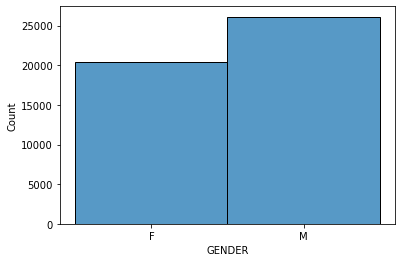

In [16]:
import seaborn as sns
sns.histplot(data=df3, x="GENDER")
plt.show()

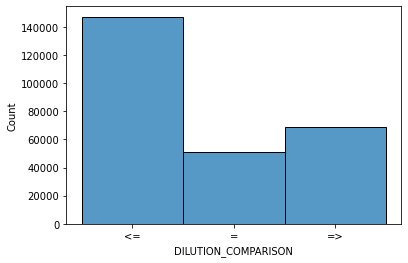

In [17]:
sns.histplot(data=data, x="DILUTION_COMPARISON")
plt.show()

In [18]:

filename3='TRANSFERS.csv'
df4 = pd.read_csv(main_path+filename3)
df4

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,EVENTTYPE,PREV_CAREUNIT,CURR_CAREUNIT,PREV_WARDID,CURR_WARDID,INTIME,OUTTIME,LOS
0,657,111,192123,254245.0,carevue,transfer,CCU,MICU,7.0,23.0,2142-04-29 15:27:11,2142-05-04 20:38:33,125.19
1,658,111,192123,NaN,carevue,transfer,MICU,NaN,23.0,45.0,2142-05-04 20:38:33,2142-05-05 11:46:32,15.13
2,659,111,192123,NaN,carevue,discharge,NaN,NaN,45.0,NaN,2142-05-05 11:46:32,NaN,NaN
3,660,111,155897,249202.0,metavision,admit,NaN,MICU,NaN,52.0,2144-07-01 04:13:59,2144-07-01 05:19:39,1.09
4,661,111,155897,NaN,metavision,transfer,MICU,NaN,52.0,32.0,2144-07-01 05:19:39,2144-07-01 06:28:29,1.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261892,259671,98385,195599,NaN,metavision,transfer,NaN,NaN,36.0,49.0,2108-10-06 11:27:11,2108-10-06 13:05:57,1.65
261893,259672,98385,195599,292167.0,metavision,transfer,NaN,SICU,49.0,33.0,2108-10-06 13:05:57,2108-10-11 17:00:31,123.91
261894,259673,98385,195599,NaN,metavision,discharge,SICU,NaN,33.0,NaN,2108-10-11 17:00:31,NaN,NaN
261895,259674,98389,155368,NaN,metavision,admit,NaN,NaN,NaN,29.0,2153-10-14 22:12:58,2153-10-14 22:21:06,0.14


In [19]:
df4.dropna(how='all')

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,EVENTTYPE,PREV_CAREUNIT,CURR_CAREUNIT,PREV_WARDID,CURR_WARDID,INTIME,OUTTIME,LOS
0,657,111,192123,254245.0,carevue,transfer,CCU,MICU,7.0,23.0,2142-04-29 15:27:11,2142-05-04 20:38:33,125.19
1,658,111,192123,NaN,carevue,transfer,MICU,NaN,23.0,45.0,2142-05-04 20:38:33,2142-05-05 11:46:32,15.13
2,659,111,192123,NaN,carevue,discharge,NaN,NaN,45.0,NaN,2142-05-05 11:46:32,NaN,NaN
3,660,111,155897,249202.0,metavision,admit,NaN,MICU,NaN,52.0,2144-07-01 04:13:59,2144-07-01 05:19:39,1.09
4,661,111,155897,NaN,metavision,transfer,MICU,NaN,52.0,32.0,2144-07-01 05:19:39,2144-07-01 06:28:29,1.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261892,259671,98385,195599,NaN,metavision,transfer,NaN,NaN,36.0,49.0,2108-10-06 11:27:11,2108-10-06 13:05:57,1.65
261893,259672,98385,195599,292167.0,metavision,transfer,NaN,SICU,49.0,33.0,2108-10-06 13:05:57,2108-10-11 17:00:31,123.91
261894,259673,98385,195599,NaN,metavision,discharge,SICU,NaN,33.0,NaN,2108-10-11 17:00:31,NaN,NaN
261895,259674,98389,155368,NaN,metavision,admit,NaN,NaN,NaN,29.0,2153-10-14 22:12:58,2153-10-14 22:21:06,0.14


In [20]:
df4.dropna(subset=['PREV_CAREUNIT','CURR_CAREUNIT','ICUSTAY_ID'])

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,EVENTTYPE,PREV_CAREUNIT,CURR_CAREUNIT,PREV_WARDID,CURR_WARDID,INTIME,OUTTIME,LOS
0,657,111,192123,254245.0,carevue,transfer,CCU,MICU,7.0,23.0,2142-04-29 15:27:11,2142-05-04 20:38:33,125.19
31,688,116,127203,208829.0,carevue,transfer,NICU,NICU,56.0,56.0,2116-10-22 22:38:33,2116-10-23 19:43:32,21.08
43,700,118,147035,237541.0,carevue,transfer,NICU,NICU,56.0,56.0,2103-08-11 15:57:15,2103-08-11 17:06:30,1.15
52,709,120,188923,273725.0,carevue,transfer,NWARD,NICU,5.0,56.0,2172-02-15 15:31:44,2172-02-15 17:21:17,1.83
53,710,120,188923,273725.0,carevue,transfer,NICU,NICU,56.0,56.0,2172-02-15 17:21:17,2172-02-15 18:26:39,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261819,258680,97660,101056,280787.0,metavision,transfer,SICU,SICU,57.0,57.0,2156-12-02 22:46:27,2156-12-11 02:39:45,195.89
261822,258683,97663,189682,268856.0,metavision,transfer,TSICU,TSICU,14.0,14.0,2107-05-29 14:25:49,2107-05-30 12:38:43,22.22
261829,258690,97664,189408,274715.0,metavision,transfer,TSICU,TSICU,14.0,14.0,2150-05-31 18:18:45,2150-06-05 16:48:24,118.49
261853,258714,97680,162636,221523.0,metavision,transfer,TSICU,MICU,14.0,50.0,2149-12-22 21:54:17,2149-12-28 16:56:04,139.03


In [21]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261897 entries, 0 to 261896
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ROW_ID         261897 non-null  int64  
 1   SUBJECT_ID     261897 non-null  int64  
 2   HADM_ID        261897 non-null  int64  
 3   ICUSTAY_ID     87721 non-null   float64
 4   DBSOURCE       261656 non-null  object 
 5   EVENTTYPE      261873 non-null  object 
 6   PREV_CAREUNIT  96009 non-null   object 
 7   CURR_CAREUNIT  96016 non-null   object 
 8   PREV_WARDID    202964 non-null  float64
 9   CURR_WARDID    202954 non-null  float64
 10  INTIME         261873 non-null  object 
 11  OUTTIME        202921 non-null  object 
 12  LOS            202921 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 26.0+ MB
